In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
# Read the .csv file as a pandas dataframe
job_data = pd.read_csv("Uncleaned_DS_jobs.csv")

In [3]:
# Explore the data
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [4]:
job_data.shape

(672, 15)

In [5]:
# Check the information structure
job_data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [6]:
# Make the replacement
job_data["Job Title"]=job_data.loc[:,"Job Title"].str.replace("(Sr.)","sr.")

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\1439774976.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  job_data["Job Title"]=job_data.loc[:,"Job Title"].str.replace("(Sr.)","sr.")


In [7]:
# Delete the rest of the instances using a regex
job_data["Job Title"]=job_data.loc[:,"Job Title"].str.extract('([^()]+)')

In [8]:
#Replace the special characters with an empty value by defining a regex pattern
job_data['Job Title'] = job_data['Job Title'].str.replace(r'[^a-zA-Z0-9-,/\s]','',regex=True)

In [9]:
# Check if there are missing values in the "Job Title" column
job_data.loc[job_data.loc[:,"Job Title"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [10]:
job_data['Company Name'] = job_data.loc[:,'Company Name'].str.replace(r"\n\d+(\.\d+)?",'',regex=True)
job_data.loc[:,"Company Name"][:10]

0           Healthfirst
1               ManTech
2        Analysis Group
3               INFICON
4    Affinity Solutions
5           HG Insights
6              Novartis
7                iRobot
8         Intuit - Data
9    XSELL Technologies
Name: Company Name, dtype: object

In [11]:
# Check if there are missing values in the "Salary Estimate" column
job_data.loc[job_data.loc[:,"Salary Estimate"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [12]:
# Check if there are missing values in the "Job Description" column
job_data.loc[job_data.loc[:,"Job Description"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [13]:
# Check if there are missing values in the "Rating" column
job_data.loc[job_data.loc[:,"Rating"]==-1.]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
154,154,ELISA RESEARCH SCIENTIST,$90K-$109K (Glassdoor est.),"Covaxx, a subsidiary of the UBI Group, has joi...",-1.0,Covid-19 Search Partners,"Hauppauge, NY",-1,-1,-1,-1,-1,-1,-1,-1
158,158,Machine Learning Engineer,$101K-$165K (Glassdoor est.),Overview\n\nRadical Convergence is a fast-pace...,-1.0,Radical Convergence,"Reston, VA",-1,-1,-1,-1,-1,-1,-1,-1
230,230,Data Scientist,$71K-$123K (Glassdoor est.),Senior Data Scientist Active Secret clearance ...,-1.0,"Encode, Inc.","Norfolk, VA","Manalapan, NJ",1 to 50 employees,-1,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1
282,282,Data Scientist,$91K-$150K (Glassdoor est.),Greetings from Trovetechs!!!\n\nÂ\n\nWe have a...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
285,285,Data Scientist,$141K-$225K (Glassdoor est.),Greetings from Trovetechs!!!\n\nÂ\n\nWe have a...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
290,290,Data Scientist,$141K-$225K (Glassdoor est.),Work Authorization Those authorized to work in...,-1.0,PETADATA,"San Francisco, CA","Fremont, CA",51 to 200 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
319,319,Data Scientist,$145K-$225K(Employer est.),"Job Description\nSelecting features, building ...",-1.0,Microagility,"New York, NY","Princeton, NJ",1 to 50 employees,-1,Company - Private,Consulting,Business Services,$1 to $5 million (USD),-1
322,322,Data Scientist,$145K-$225K(Employer est.),Job Description\nData Scientist\nAre you inter...,-1.0,"Rainmaker Resources, LLC","Cincinnati, OH","Cincinnati, OH",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
329,329,Data Scientist,$79K-$147K (Glassdoor est.),Description:\n\nPosition Requires a Top Secret...,-1.0,B4Corp,"Reston, VA","Leesburg, VA",51 to 200 employees,-1,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1
338,338,Data Scientist,$79K-$147K (Glassdoor est.),Work in a fast growing startup with unlimited ...,-1.0,Stride Search,"San Francisco, CA","Westlake Village, CA",1 to 50 employees,-1,Company - Private,-1,-1,Less than $1 million (USD),-1


In [14]:
# Replace missing values in the 'Rating' column with the mean of that column
mean_rating = round(job_data['Rating'].mean(), 1)
job_data.loc[job_data["Rating"] == -1, "Rating"] = mean_rating

In [15]:
# Display the unique values in the "Rating" column after replacement
job_data['Rating'].unique()

array([3.1, 4.2, 3.8, 3.5, 2.9, 3.9, 4.4, 3.6, 4.5, 4.7, 3.7, 3.4, 4.1,
       3.2, 4.3, 2.8, 5. , 4.8, 3.3, 2.7, 2.2, 2.6, 4. , 2.5, 4.9, 2.4,
       2.3, 4.6, 3. , 2.1, 2. ])

In [16]:
# Check if there are missing values in the "Company Name" column
job_data.loc[job_data.loc[:,"Company Name"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [17]:
# Check if there are missing values in the "Location" column
job_data.loc[job_data.loc[:,"Location"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [18]:
# Check if there are missing values in the "Headquarters" column
job_data.loc[job_data.loc[:,"Headquarters"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
154,154,ELISA RESEARCH SCIENTIST,$90K-$109K (Glassdoor est.),"Covaxx, a subsidiary of the UBI Group, has joi...",3.5,Covid-19 Search Partners,"Hauppauge, NY",-1,-1,-1,-1,-1,-1,-1,-1
158,158,Machine Learning Engineer,$101K-$165K (Glassdoor est.),Overview\n\nRadical Convergence is a fast-pace...,3.5,Radical Convergence,"Reston, VA",-1,-1,-1,-1,-1,-1,-1,-1
258,258,Data Scientist,$90K-$124K (Glassdoor est.),Full Time Data Scientist\n\nThe Drive Media is...,5.0,"The Drive Media, Inc.","New York, NY",-1,Unknown,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
351,351,Data Scientist,$122K-$146K (Glassdoor est.),About Our AI/ML Team\n\nOur mission is to buil...,3.5,Point72 Ventures,"Palo Alto, CA",-1,-1,-1,-1,-1,-1,-1,-1
357,357,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,3.5,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
358,358,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,3.5,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
359,359,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,3.5,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
360,360,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,3.5,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
361,361,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,3.5,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
362,362,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,3.5,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [19]:
# Remove records with "-1" in the "Headquarters" column
new_job_data = job_data[job_data["Headquarters"] != "-1"]

In [20]:
# Check if there are any null value in "Headquarter"column
new_job_data.loc[new_job_data.loc[:,"Headquarters"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [21]:
# Check if there are any null value in "Size"column
new_job_data.loc[new_job_data.loc[:,"Size"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [22]:
# Check if there are any null value in "Founded"column
new_job_data.loc[new_job_data.loc[:,"Founded"]==-1]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
69,69,Data Scientist - Machine Learning,$79K-$131K (Glassdoor est.),"Headquartered in Brisbane, Calif., CareDx, Inc...",2.5,CareDx,"Brisbane, CA","Brisbane, CA",1 to 50 employees,-1,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,Sequenom
112,112,Data Scientist,$99K-$132K (Glassdoor est.),Are you an intelligence analyst looking to fur...,3.5,Maxar Technologies,"Herndon, VA","Westminster, CO",5001 to 10000 employees,-1,Company - Public,Aerospace & Defense,Aerospace & Defense,$2 to $5 billion (USD),-1
162,162,Geospatial Data Scientist,$101K-$165K (Glassdoor est.),Maxar is seeking a seasoned Geospatial Data Sp...,3.5,Maxar Technologies,"Chantilly, VA","Westminster, CO",5001 to 10000 employees,-1,Company - Public,Aerospace & Defense,Aerospace & Defense,$2 to $5 billion (USD),-1
193,193,Data Scientist,$56K-$97K (Glassdoor est.),Job Description\nClient JD below:\n\nWe need a...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1
195,195,Data Scientist,$56K-$97K (Glassdoor est.),"About Joby\nLocated in Northern California, th...",4.3,Joby Aviation,"San Carlos, CA","Santa Cruz, CA",51 to 200 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,Data Scientist,$105K-$167K (Glassdoor est.),"Role: Data ScientistÂ\n\nLocation: Washington,...",4.0,Comtech Global Inc,"Washington, DC","Columbus, OH",51 to 200 employees,-1,Company - Private,"Health, Beauty, & Fitness",Consumer Services,$5 to $10 million (USD),-1
661,661,Data Scientist,$105K-$167K (Glassdoor est.),Our Data Scientist is responsible for in-depth...,3.6,Qurate Retail Group,"West Chester, PA","West Chester, PA",10000+ employees,-1,Company - Public,Other Retail Stores,Retail,Unknown / Non-Applicable,-1
662,662,Data Scientist,$105K-$167K (Glassdoor est.),Solution IT Inc. is looking for an Data Scient...,4.4,"SolutionIT, Inc.","Edison, NJ","Wilmington, MA",51 to 200 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
664,664,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nClear Ridge has an exciting o...,3.5,Clear Ridge Defense,"Quantico, VA","Baltimore, MD",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1


In [23]:
# Replace the "Founded" yr column 
new_job_data.loc[new_job_data["Company Name"] == "CareDx", "Founded"] = 1998
new_job_data.loc[new_job_data["Company Name"] == "Maxar Technologies", "Founded"] = 2017
new_job_data.loc[new_job_data["Company Name"] == "SkillSoniq", "Founded"] = 2016
new_job_data.loc[new_job_data["Company Name"] == "Joby Aviation", "Founded"] = 2009
new_job_data.loc[new_job_data["Company Name"] == "Comtech Global Inc", "Founded"] = 2006
new_job_data.loc[new_job_data["Company Name"] == "Qurate Retail Group", "Founded"] = 1998
new_job_data.loc[new_job_data["Company Name"] == "SolutionIT, Inc", "Founded"] = 1989
new_job_data.loc[new_job_data["Company Name"] == "Clear Ridge Defense", "Founded"] = 2015
new_job_data.loc[new_job_data["Company Name"] == "ChaTeck Incorporated", "Founded"] = 2000
new_job_data.loc[new_job_data["Company Name"] == "Encode, Inc", "Founded"] = 2000
new_job_data.loc[new_job_data["Company Name"] == "Surya Systems", "Founded"] = 1997
new_job_data.loc[new_job_data["Company Name"] == "Predictive Research Inc", "Founded"] = 1999
new_job_data.loc[new_job_data["Company Name"] == "Sprezzatura Management Consulting", "Founded"] = 2011
new_job_data.loc[new_job_data["Company Name"] == "Descript", "Founded"] = 2017
new_job_data.loc[new_job_data["Company Name"] == "Better Hire", "Founded"] = 2016
new_job_data.loc[new_job_data["Company Name"] == "Tygart Technology, Inc", "Founded"] = 1992
new_job_data.loc[new_job_data["Company Name"] == "Advanced Bio-Logic Solutions Corp", "Founded"] = 2002
new_job_data.loc[new_job_data["Company Name"] == "Central Business Solutions, Inc", "Founded"] = 2000
new_job_data.loc[new_job_data["Company Name"] == "Unicom Technologies INC", "Founded"] = 2005
new_job_data.loc[new_job_data["Company Name"] == "Trovetechs Inc", "Founded"] = 2005
new_job_data.loc[new_job_data["Company Name"] == "PETADATA","Founded"] = 2016
new_job_data.loc[new_job_data["Company Name"] == "Capio Group", "Founded"] = 2014
new_job_data.loc[new_job_data["Company Name"] == "Colony Brands", "Founded"] = 1982
new_job_data.loc[new_job_data["Company Name"] == "Kollasoft Inc", "Founded"] = 2005
new_job_data.loc[new_job_data["Company Name"] == "Capio Group", "Founded"] = 2007
new_job_data.loc[new_job_data["Company Name"] == "Advance Sourcing Concepts", "Founded"] = 1964
new_job_data.loc[new_job_data["Company Name"] == "Microagility", "Founded"] = 2003
new_job_data.loc[new_job_data["Company Name"] == "Conch Technologies, Inc", "Founded"] = 2004
new_job_data.loc[new_job_data["Company Name"] == "Rainmaker Resources, LLC", "Founded"] = 2011
new_job_data.loc[new_job_data["Company Name"] == "B4Corp", "Founded"] = 2010
new_job_data.loc[new_job_data["Company Name"] == "WCG (WIRB-Copernicus Group)", "Founded"] = 2012
new_job_data.loc[new_job_data["Company Name"] == "PROPRIUS", "Founded"] = 1993
new_job_data.loc[new_job_data["Company Name"] == "Latitude, Inc", "Founded"] = 2019
new_job_data.loc[new_job_data["Company Name"] == "TECHNOCRAFT Solutions", "Founded"] = 2013
new_job_data.loc[new_job_data["Company Name"] == "Conflux Systems Inc", "Founded"] = 2017
new_job_data.loc[new_job_data["Company Name"] == "Microagility", "Founded"] = 2003
new_job_data.loc[new_job_data["Company Name"] == "Falcon IT & Staffing Solutions", "Founded"] = 2013
new_job_data.loc[new_job_data["Company Name"] == "DataLab USA", "Founded"] = 1979
new_job_data.loc[new_job_data["Company Name"] == "Sonde Health", "Founded"] = 2015
new_job_data.loc[new_job_data["Company Name"] == "Hackensack Meridian Health", "Founded"] = 2016
new_job_data.loc[new_job_data["Company Name"] == "Numeric, LLC", "Founded"] = 2013
new_job_data.loc[new_job_data["Company Name"] == "Centraprise", "Founded"] = 2019
new_job_data.loc[new_job_data["Company Name"] == "Lorven Technologies Inc", "Founded"] = 2001
new_job_data.loc[new_job_data["Company Name"] == "Two95 International Inc", "Founded"] = 2009
new_job_data.loc[new_job_data["Company Name"] == "Sharpedge Solutions Inc", "Founded"] = 2000
new_job_data.loc[new_job_data["Company Name"] == "Xator Corporation", "Founded"] = 2005
new_job_data.loc[new_job_data["Company Name"] == "Temboo", "Founded"] = 2016
new_job_data.loc[new_job_data["Company Name"] == "Applied Research Laboratories", "Founded"] = 2003
new_job_data.loc[new_job_data["Company Name"] == "Conagen", "Founded"] = 2010
new_job_data.loc[new_job_data["Company Name"] == "IMG Systems", "Founded"] = 2010


In [24]:
# Remove records where the "Founded" column has a value of -1
new_job_data = new_job_data[new_job_data["Founded"] != -1]

In [25]:
new_job_data

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,srData Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,665,Data Scientist,$105K-$167K (Glassdoor est.),Criterion Systems seeks a Data Scientist to su...,3.8,"Criterion Systems, Inc.","Vienna, VA","Vienna, VA",201 to 500 employees,2005,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1
666,666,Data Scientist,$105K-$167K (Glassdoor est.),About Foundation Medicine:\n\nFoundation Medic...,4.0,Foundation Medicine,"Boston, MA","Cambridge, MA",1001 to 5000 employees,2010,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD),"Genomic Health, Myriad Genetics, The Broad Ins..."
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2000,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [26]:
# Check if there are any null value in "Type of ownership"column
new_job_data.loc[new_job_data.loc[:,"Type of ownership"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [27]:
# Check if there are any null value in "Industry"column
new_job_data.loc[new_job_data.loc[:,"Industry"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
42,42,Data Analyst I,$75K-$131K (Glassdoor est.),Who is Cenlar?\n\nYou are.\n\nEmployee-owners ...,2.6,Cenlar,"Ewing, NJ","Ewing, NJ",1001 to 5000 employees,1958,Company - Private,-1,-1,$100 to $500 million (USD),-1
168,168,Data Engineer,$101K-$165K (Glassdoor est.),Job Number: 10202\nGroup: Cosma International\...,3.5,Magna International Inc.,"Birmingham, AL","Aurora, Canada",10000+ employees,1957,Company - Public,-1,-1,$10+ billion (USD),"Bosch, Lear Corporation, Faurecia"
193,193,Data Scientist,$56K-$97K (Glassdoor est.),Job Description\nClient JD below:\n\nWe need a...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,2016,Company - Public,-1,-1,Unknown / Non-Applicable,-1
195,195,Data Scientist,$56K-$97K (Glassdoor est.),"About Joby\nLocated in Northern California, th...",4.3,Joby Aviation,"San Carlos, CA","Santa Cruz, CA",51 to 200 employees,2009,Company - Private,-1,-1,Unknown / Non-Applicable,-1
248,248,Data Scientist,$90K-$124K (Glassdoor est.),Descript is a new kind of audio/video creation...,4.3,Descript,"San Francisco, CA","Houston, TX",1 to 50 employees,2017,Company - Private,-1,-1,Less than $1 million (USD),-1
251,251,Data Scientist,$90K-$124K (Glassdoor est.),We are looking for a Data Scientist to analyze...,4.0,Better Hire,"Birmingham, AL","Birmingham, AL",1 to 50 employees,2016,Company - Private,-1,-1,Unknown / Non-Applicable,-1
272,272,Data Scientist,$91K-$150K (Glassdoor est.),Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,1963,Company - Public,-1,-1,$10+ billion (USD),"AT&T, Verizon"
274,274,Data Scientist,$91K-$150K (Glassdoor est.),Job Description\nClient JD below:\n\nWe need a...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,2016,Company - Public,-1,-1,Unknown / Non-Applicable,-1
282,282,Data Scientist,$91K-$150K (Glassdoor est.),Greetings from Trovetechs!!!\n\nÂ\n\nWe have a...,3.5,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,2005,Company - Private,-1,-1,Unknown / Non-Applicable,-1
285,285,Data Scientist,$141K-$225K (Glassdoor est.),Greetings from Trovetechs!!!\n\nÂ\n\nWe have a...,3.5,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,2005,Company - Private,-1,-1,Unknown / Non-Applicable,-1


In [28]:
new_job_data.loc[new_job_data["Company Name"] == "Cenlar", "Industry"] = "Banks & Credit Unions"
new_job_data.loc[new_job_data["Company Name"] == "Magna International Inc", "Industry"] = "Telecommunications Manufacturing"
new_job_data.loc[new_job_data["Company Name"] == "Descript", "Industry"] = "IT Services"
new_job_data.loc[new_job_data["Company Name"] == "Comcast", "Industry"] = "Telecommunications Manufacturing"
new_job_data.loc[new_job_data["Company Name"] == "Advance Sourcing Concepts", "Industry"] = "IT Services"
new_job_data.loc[new_job_data["Company Name"] == "Tygart Technology, Inc", "Industry"] = "Computer Hardware & Software"
new_job_data.loc[new_job_data["Company Name"] == "Advanced Bio-Logic Solutions Corp", "Industry"] = "Biotech & Pharmaceuticals"

In [29]:
new_job_data=new_job_data.loc[new_job_data.loc[:,"Industry"]!="-1"]
new_job_data

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,srData Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,665,Data Scientist,$105K-$167K (Glassdoor est.),Criterion Systems seeks a Data Scientist to su...,3.8,"Criterion Systems, Inc.","Vienna, VA","Vienna, VA",201 to 500 employees,2005,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1
666,666,Data Scientist,$105K-$167K (Glassdoor est.),About Foundation Medicine:\n\nFoundation Medic...,4.0,Foundation Medicine,"Boston, MA","Cambridge, MA",1001 to 5000 employees,2010,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD),"Genomic Health, Myriad Genetics, The Broad Ins..."
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2000,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [30]:
# Check if there are any null value in "Industry"column
new_job_data.loc[new_job_data.loc[:,"Sector"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
42,42,Data Analyst I,$75K-$131K (Glassdoor est.),Who is Cenlar?\n\nYou are.\n\nEmployee-owners ...,2.6,Cenlar,"Ewing, NJ","Ewing, NJ",1001 to 5000 employees,1958,Company - Private,Banks & Credit Unions,-1,$100 to $500 million (USD),-1
248,248,Data Scientist,$90K-$124K (Glassdoor est.),Descript is a new kind of audio/video creation...,4.3,Descript,"San Francisco, CA","Houston, TX",1 to 50 employees,2017,Company - Private,IT Services,-1,Less than $1 million (USD),-1
272,272,Data Scientist,$91K-$150K (Glassdoor est.),Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,1963,Company - Public,Telecommunications Manufacturing,-1,$10+ billion (USD),"AT&T, Verizon"
316,316,Data Scientist,$145K-$225K(Employer est.),Job Description\nEssential Responsibilities:\n...,3.4,Advance Sourcing Concepts,"Pittsburgh, PA","Pittsburgh, PA",51 to 200 employees,1964,Company - Private,IT Services,-1,$1 to $5 million (USD),-1
494,494,Data Scientist,$95K-$119K (Glassdoor est.),Tygart is currently seeking Data Scientist to ...,4.7,"Tygart Technology, Inc","Washington, DC","Fairmont, WV",1 to 50 employees,1992,Company - Private,Computer Hardware & Software,-1,$1 to $5 million (USD),-1
610,610,Data Scientist,$80K-$132K (Glassdoor est.),Tygart is currently seeking Data Scientist to ...,4.7,"Tygart Technology, Inc","Washington, DC","Fairmont, WV",1 to 50 employees,1992,Company - Private,Computer Hardware & Software,-1,$1 to $5 million (USD),-1
621,621,Data Scientist,$87K-$141K (Glassdoor est.),Day to Day Responsibilities:\nDaily responsibi...,4.0,Advanced Bio-Logic Solutions Corp,"Thousand Oaks, CA","Westlake Village, CA",1 to 50 employees,2002,Company - Private,Biotech & Pharmaceuticals,-1,Less than $1 million (USD),-1


In [31]:
new_job_data.loc[new_job_data["Company Name"] == "Cenlar", "Sector"] = "Finance"
new_job_data.loc[new_job_data["Company Name"] == "Magna International Inc", "Sector"] = "Telecommunications"
new_job_data.loc[new_job_data["Company Name"] == "Descript", "Sector"] = "Information Technology"
new_job_data.loc[new_job_data["Company Name"] == "Comcast", "Sector"] = "Telecommunications"
new_job_data.loc[new_job_data["Company Name"] == "Advance Sourcing Concepts", "Sector"] = "Information Technology"
new_job_data.loc[new_job_data["Company Name"] == "Tygart Technology, Inc", "Sector"] = "Information Technology"
new_job_data.loc[new_job_data["Company Name"] == "Advanced Bio-Logic Solutions Corp", "Sector"] = "Biotech & Pharmaceuticals"

In [32]:
new_job_data.loc[new_job_data.loc[:,"Sector"]=="-1"]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [33]:
# Inspect the revenue column
job_data['Revenue'].value_counts()

Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64

In [34]:
def revenue_cleanup(revenue):
    return revenue.replace("-1", "n/a").replace("Unknown / Non-Applicable", "n/a")

new_job_data['Revenue'] = revenue_cleanup(new_job_data['Revenue'])

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\2943733613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Revenue'] = revenue_cleanup(new_job_data['Revenue'])


In [35]:
new_job_data['Revenue']=new_job_data.loc[:,'Revenue'].str.extract('([^()]+)')
new_job_data['Revenue'].value_counts()

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\723216824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Revenue']=new_job_data.loc[:,'Revenue'].str.extract('([^()]+)')


n/a                            183
$100 to $500 million            94
$10+ billion                    62
$2 to $5 billion                45
$10 to $25 million              40
$1 to $2 billion                36
$25 to $50 million              36
$50 to $100 million             31
$1 to $5 million                26
$500 million to $1 billion      19
$5 to $10 million               13
Less than $1 million            10
$5 to $10 billion                8
Name: Revenue, dtype: int64

In [36]:
# Drop the index column
new_job_data.drop('index',axis=1,inplace=True)

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\3778328715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data.drop('index',axis=1,inplace=True)


In [37]:
# Inspect the competitors column
new_job_data['Competitors'].value_counts()

-1                                                                                              433
Roche, GlaxoSmithKline, Novartis                                                                 10
Los Alamos National Laboratory, Battelle, SRI International                                       6
Leidos, CACI International, Booz Allen Hamilton                                                   6
MIT Lincoln Laboratory, Lockheed Martin, Northrop Grumman                                         3
                                                                                               ... 
AT&T, Verizon                                                                                     1
Los Alamos National Laboratory, NASA Jet Propulsion Laboratory, Sandia National Laboratories      1
Fluor, Bechtel, AECOM                                                                             1
Intertek, SGS, Bureau Veritas                                                                     1


In [38]:
np.round((438/610)*100,decimals=2)

71.8

In [39]:
#The percentage is too high so we drop this column
new_job_data.drop('Competitors',axis=1,inplace=True)

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\249361949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data.drop('Competitors',axis=1,inplace=True)


In [40]:
# Check for duplicates
new_job_data[new_job_data.duplicated()].shape
new_job_data[new_job_data.duplicated()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
135,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte,Remote,"San Francisco, CA",51 to 200 employees,2015,Company - Private,Computer Hardware & Software,Information Technology,n/a
136,Senior Data Engineer,$90K-$109K (Glassdoor est.),Lendio is looking to fill a position for a Sen...,4.9,Lendio,"Lehi, UT","Lehi, UT",201 to 500 employees,2011,Company - Private,Lending,Finance,$50 to $100 million


In [41]:
# Drop duplicates
# new_job_data.drop_duplicates(inplace=True)
# Do not drop the thoes recordes because they are not same

In [42]:
#Inspect the salary estimate column
new_job_data['Salary Estimate'][100:200]

100    $99K-$132K (Glassdoor est.)
101    $99K-$132K (Glassdoor est.)
102    $99K-$132K (Glassdoor est.)
103    $99K-$132K (Glassdoor est.)
104    $99K-$132K (Glassdoor est.)
                  ...             
200    $79K-$106K (Glassdoor est.)
201    $79K-$106K (Glassdoor est.)
202    $79K-$106K (Glassdoor est.)
203    $79K-$106K (Glassdoor est.)
204    $79K-$106K (Glassdoor est.)
Name: Salary Estimate, Length: 100, dtype: object

In [43]:
# Define a function to extract the salary limits
def extract_values(text):
    if not isinstance(text, str):
        return None, None
    
    extracted_integer = ''
    modified_string = ''
    
    for i in range(len(text)):
        if i + 1 < len(text):
            if text[i].isdigit():
                extracted_integer += text[i]
                if not text[i + 1].isdigit():
                    break
        if i == len(text) - 1 and text[i].isdigit():
            extracted_integer += text[i]
    
    if extracted_integer:
        modified_string = text[:text.find(extracted_integer)] + text[text.find(extracted_integer) + len(str(extracted_integer)):]
        extracted_integer = int(extracted_integer)
    
    return extracted_integer, modified_string


In [44]:
#Obtain the minimum salary in the range
new_job_data['Min Salary K$'], new_job_data['Salary Estimate'] = zip(*new_job_data['Salary Estimate'].apply(extract_values))

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\2654974993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Min Salary K$'], new_job_data['Salary Estimate'] = zip(*new_job_data['Salary Estimate'].apply(extract_values))


In [45]:
#Obtain the maximum salary in the range
new_job_data['Max Salary K$'], new_job_data['Salary Estimate'] = zip(*new_job_data['Salary Estimate'].apply(extract_values))

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\1455237208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Max Salary K$'], new_job_data['Salary Estimate'] = zip(*new_job_data['Salary Estimate'].apply(extract_values))


In [46]:
#Drop the old salary range column
new_job_data.drop('Salary Estimate', axis=1, inplace=True)

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\3180386729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data.drop('Salary Estimate', axis=1, inplace=True)


In [47]:
# Obtain the average salary estimate, handling non-finite values
new_job_data['Avg Salary Estimate'] = np.round((new_job_data['Min Salary K$'] + new_job_data['Max Salary K$']) / 2, decimals=0)
new_job_data['Avg Salary Estimate'] = new_job_data['Avg Salary Estimate'].astype('Int64')
new_job_data.head()


C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\1829810941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Avg Salary Estimate'] = np.round((new_job_data['Min Salary K$'] + new_job_data['Max Salary K$']) / 2, decimals=0)
C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\1829810941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Avg Salary Estimate'] = new_job_data['Avg Salary Estimate'].astype('Int64')


,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min Salary K$,Max Salary K$,Avg Salary Estimate
0,srData Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,n/a,137,171,154
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion,137,171,154
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million,137,171,154
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million,137,171,154
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,n/a,137,171,154


In [48]:
# obtain the years the company has been in the market and drop the founed column
current_year = datetime.now().year
new_job_data['Years in Market'] = current_year - new_job_data['Founded']
new_job_data.drop('Founded',axis=1,inplace=True)
new_job_data.head()

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\839674287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Years in Market'] = current_year - new_job_data['Founded']
C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\839674287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data.drop('Founded',axis=1,inplace=True)


,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Min Salary K$,Max Salary K$,Avg Salary Estimate,Years in Market
0,srData Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,n/a,137,171,154,31
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion,137,171,154,56
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million,137,171,154,43
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million,137,171,154,24
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,n/a,137,171,154,26


In [49]:
# Inspect the location column
new_job_data['Location'][:10]

0         New York, NY
1        Chantilly, VA
2           Boston, MA
3           Newton, MA
4         New York, NY
5    Santa Barbara, CA
6        Cambridge, MA
7          Bedford, MA
8        San Diego, CA
9          Chicago, IL
Name: Location, dtype: object

In [50]:
# Check the counts of each unique location state
new_job_data.loc[:,"Location"].apply(lambda x: x.split(",")[-1]).value_counts()

 CA              135
 VA               78
 MA               59
 NY               47
 MD               40
 IL               27
 DC               23
 WA               15
 TX               15
 MO               12
 PA               11
 OH               11
 CO               10
 GA                9
United States      9
 NC                9
 FL                8
 NJ                8
 TN                8
 WI                6
 OK                6
Remote             6
 IN                5
 MI                5
 AZ                4
 CT                4
 MN                4
 IA                3
 UT                3
 OR                2
New Jersey         2
 SC                2
 RI                2
Utah               2
 NH                2
 NE                2
 AL                2
 MS                1
 LA                1
 KS                1
Texas              1
 DE                1
California         1
 WV                1
Name: Location, dtype: int64

In [51]:
# Create the state column
new_job_data['Location State'] = new_job_data['Location'].apply(lambda x: x.split(',')[-1].strip())

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\2670836312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Location State'] = new_job_data['Location'].apply(lambda x: x.split(',')[-1].strip())


In [52]:
# Replace the inconsistencies with their correct state abbreviation
def clean_location(location):
    state_mapping = {
        "California": "CA",
        "Texas": "TX",
        "Utah": "UT",
        "New Jersey": "NJ",
        "Remote": "REM",
        "United States": "US"
    }
    
    return state_mapping.get(location, location)

new_job_data['Location State'] = new_job_data['Location State'].map(clean_location)


C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\3364505509.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Location State'] = new_job_data['Location State'].map(clean_location)


In [53]:
new_job_data["Location State"].value_counts()

CA     136
VA      78
MA      59
NY      47
MD      40
IL      27
DC      23
TX      16
WA      15
MO      12
PA      11
OH      11
CO      10
NJ      10
GA       9
US       9
NC       9
FL       8
TN       8
WI       6
OK       6
REM      6
UT       5
MI       5
IN       5
MN       4
AZ       4
CT       4
IA       3
RI       2
AL       2
OR       2
SC       2
NH       2
NE       2
MS       1
LA       1
KS       1
DE       1
WV       1
Name: Location State, dtype: int64

In [54]:
# Check if the location of the job and the HQ are in the place
new_job_data['Same State'] = (new_job_data['Location'] == new_job_data['Headquarters']).astype(int)

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\2291911390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_job_data['Same State'] = (new_job_data['Location'] == new_job_data['Headquarters']).astype(int)


In [55]:
new_job_data.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Min Salary K$,Max Salary K$,Avg Salary Estimate,Years in Market,Location State,Same State
0,srData Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,n/a,137,171,154,31,NY,1
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion,137,171,154,56,VA,0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million,137,171,154,43,MA,1
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million,137,171,154,24,MA,0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,n/a,137,171,154,26,NY,1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


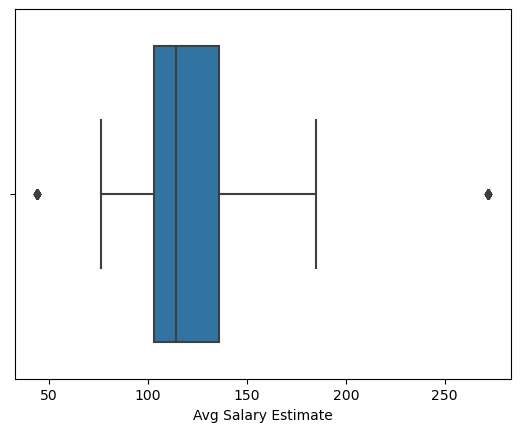

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'Avg Salary Estimate'
sns.boxplot(x=new_job_data['Avg Salary Estimate'])
plt.show()


In [57]:
std_deviation = new_job_data['Avg Salary Estimate'].std()
print(f"Standard Deviation of 'Avg Salary Estimate': {std_deviation}")

Standard Deviation of 'Avg Salary Estimate': 39.220203957842834


In [58]:
Q1 = new_job_data['Avg Salary Estimate'].quantile(0.25)
Q3 = new_job_data['Avg Salary Estimate'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((new_job_data['Avg Salary Estimate'] < Q1 - 1.5 * IQR) | (new_job_data['Avg Salary Estimate'] > Q3 + 1.5 * IQR))


In [59]:
# Count the number of outliers.
outliers.sum()

36

In [60]:
# Remove outliers and create a new DataFrame
filtered_job_data = new_job_data[~outliers]

In [61]:
# Display the resulting DataFrame without outliers
filtered_job_data

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Min Salary K$,Max Salary K$,Avg Salary Estimate,Years in Market,Location State,Same State
0,srData Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,n/a,137,171,154,31,NY,1
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion,137,171,154,56,VA,0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million,137,171,154,43,MA,1
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million,137,171,154,24,MA,0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,n/a,137,171,154,26,NY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Data Scientist,Criterion Systems seeks a Data Scientist to su...,3.8,"Criterion Systems, Inc.","Vienna, VA","Vienna, VA",201 to 500 employees,Company - Private,IT Services,Information Technology,$50 to $100 million,105,167,136,19,VA,1
666,Data Scientist,About Foundation Medicine:\n\nFoundation Medic...,4.0,Foundation Medicine,"Boston, MA","Cambridge, MA",1001 to 5000 employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million,105,167,136,14,MA,0
667,Data Scientist,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,n/a,105,167,136,35,NJ,1
670,Data Scientist,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million,105,167,136,24,CA,0


In [62]:
# We can proceed by adding an additional column that can help us catergorize the job roles into 4 specific roles for the EDA part.
def role_defining(title): 
    if any(keyword in title.lower() for keyword in ['data scientist', 'data science']):
        return 'Data Scientist'
    elif any(keyword in title.lower() for keyword in ['data analyst', 'analyst']):
        return 'Data Analyst'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif any(keyword in title.lower() for keyword in ['machine learning', 'ai']):
        return 'Machine Learning Engineer'
    else:
        return 'Other'

In [63]:
# Apply the function to the new column
filtered_job_data['Job Role']= filtered_job_data['Job Title'].apply(role_defining)
filtered_job_data['Job Role'].value_counts()

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\3113181301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_job_data['Job Role']= filtered_job_data['Job Title'].apply(role_defining)


Data Scientist               381
Other                         57
Data Analyst                  52
Data Engineer                 44
Machine Learning Engineer     33
Name: Job Role, dtype: int64

In [64]:
# Proceed in a similar way to obtain the level of seniority in a new column
def seniority_defining(title,description):
    if any(keyword in title.lower() for keyword in ['jr.','jr','junior']) or any(keyword in description.lower() for keyword in ['jr.','jr','junior']):
        return 'Jr'
    elif any(keyword in title.lower() for keyword in ['sr.','sr','vp','senior']) or any(keyword in description.lower() for keyword in ['sr.','sr','vp','senior']):
        return 'Sr'
    else:
        return 'Mid-Level'
    

filtered_job_data['Job Seniority'] = filtered_job_data.apply(lambda row: seniority_defining(row['Job Title'], row['Job Description']), axis=1)
filtered_job_data['Job Seniority'].value_counts()

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\1679822843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_job_data['Job Seniority'] = filtered_job_data.apply(lambda row: seniority_defining(row['Job Title'], row['Job Description']), axis=1)


Mid-Level    354
Sr           180
Jr            33
Name: Job Seniority, dtype: int64

In [65]:
# Create dummy columns for each of the considered skills
filtered_job_data['excel'] = filtered_job_data.apply(lambda x: 1 if 'excel' in x['Job Description'].lower() else 0, axis=1)
filtered_job_data['sql'] = filtered_job_data.apply(lambda x: 1 if 'sql' in x['Job Description'].lower() else 0, axis=1)
filtered_job_data['python'] = filtered_job_data.apply(lambda x: 1 if 'python' in x['Job Description'].lower() else 0, axis=1)
filtered_job_data['power_bi'] = filtered_job_data.apply(lambda x: 1 if 'power bi' in x['Job Description'].lower() else 0, axis=1)
filtered_job_data['tableau'] = filtered_job_data.apply(lambda x: 1 if 'tableau' in x['Job Description'].lower() else 0, axis=1)
filtered_job_data['scikit'] = filtered_job_data.apply(lambda x: 1 if 'scikit' in x['Job Description'].lower() else 0, axis=1)
filtered_job_data['spark'] = filtered_job_data.apply(lambda x: 1 if 'spark' in x['Job Description'].lower() else 0, axis=1)

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\3845056995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_job_data['excel'] = filtered_job_data.apply(lambda x: 1 if 'excel' in x['Job Description'].lower() else 0, axis=1)
C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\3845056995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_job_data['sql'] = filtered_job_data.apply(lambda x: 1 if 'sql' in x['Job Description'].lower() else 0, axis=1)
C:\Users\MyPc\AppData\Local\Temp\ipykernel_1

In [66]:
print(filtered_job_data['excel'].value_counts())
print(filtered_job_data['sql'].value_counts())
print(filtered_job_data['python'].value_counts())
print(filtered_job_data['power_bi'].value_counts())
print(filtered_job_data['tableau'].value_counts())
print(filtered_job_data['scikit'].value_counts())
print(filtered_job_data['spark'].value_counts())

0    319
1    248
Name: excel, dtype: int64
1    307
0    260
Name: sql, dtype: int64
1    417
0    150
Name: python, dtype: int64
0    541
1     26
Name: power_bi, dtype: int64
0    461
1    106
Name: tableau, dtype: int64
0    507
1     60
Name: scikit, dtype: int64
0    412
1    155
Name: spark, dtype: int64


In [67]:
# Check if we have any '-1' as missing values
filtered_job_data[filtered_job_data.eq('-1').any(axis = 1)]

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,Same State,Job Role,Job Seniority,excel,sql,python,power_bi,tableau,scikit,spark


In [68]:
# Check if we have a numerical missing value in any column 
filtered_job_data[filtered_job_data.eq(-1).any(axis = 1)]

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,Same State,Job Role,Job Seniority,excel,sql,python,power_bi,tableau,scikit,spark


In [69]:
filtered_job_data.to_csv('Cleaned_Job_Data.csv',index= False)
filtered_job_data.to_excel('Cleaned_Job_Data.xlsx',index=False)

# EDA

In [70]:
# Import the libraries which need to analysis and visualization.
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Describe the dataset
filtered_job_data.describe()

,Rating,Min Salary K$,Max Salary K$,Avg Salary Estimate,Years in Market,Same State,excel,sql,python,power_bi,tableau,scikit,spark
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,3.865961,97.010582,144.107584,120.525573,38.165785,0.444444,0.437390,0.541446,0.735450,0.045855,0.186949,0.105820,0.273369
std,0.601255,24.315721,32.315156,26.934595,39.917238,0.497343,0.496502,0.498719,0.441483,0.209356,0.390215,0.307879,0.446082
min,2.000000,56.000000,97.000000,76.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,79.000000,121.000000,103.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,91.000000,132.000000,114.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,112.000000,163.000000,136.000000,45.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,145.000000,225.000000,185.000000,243.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


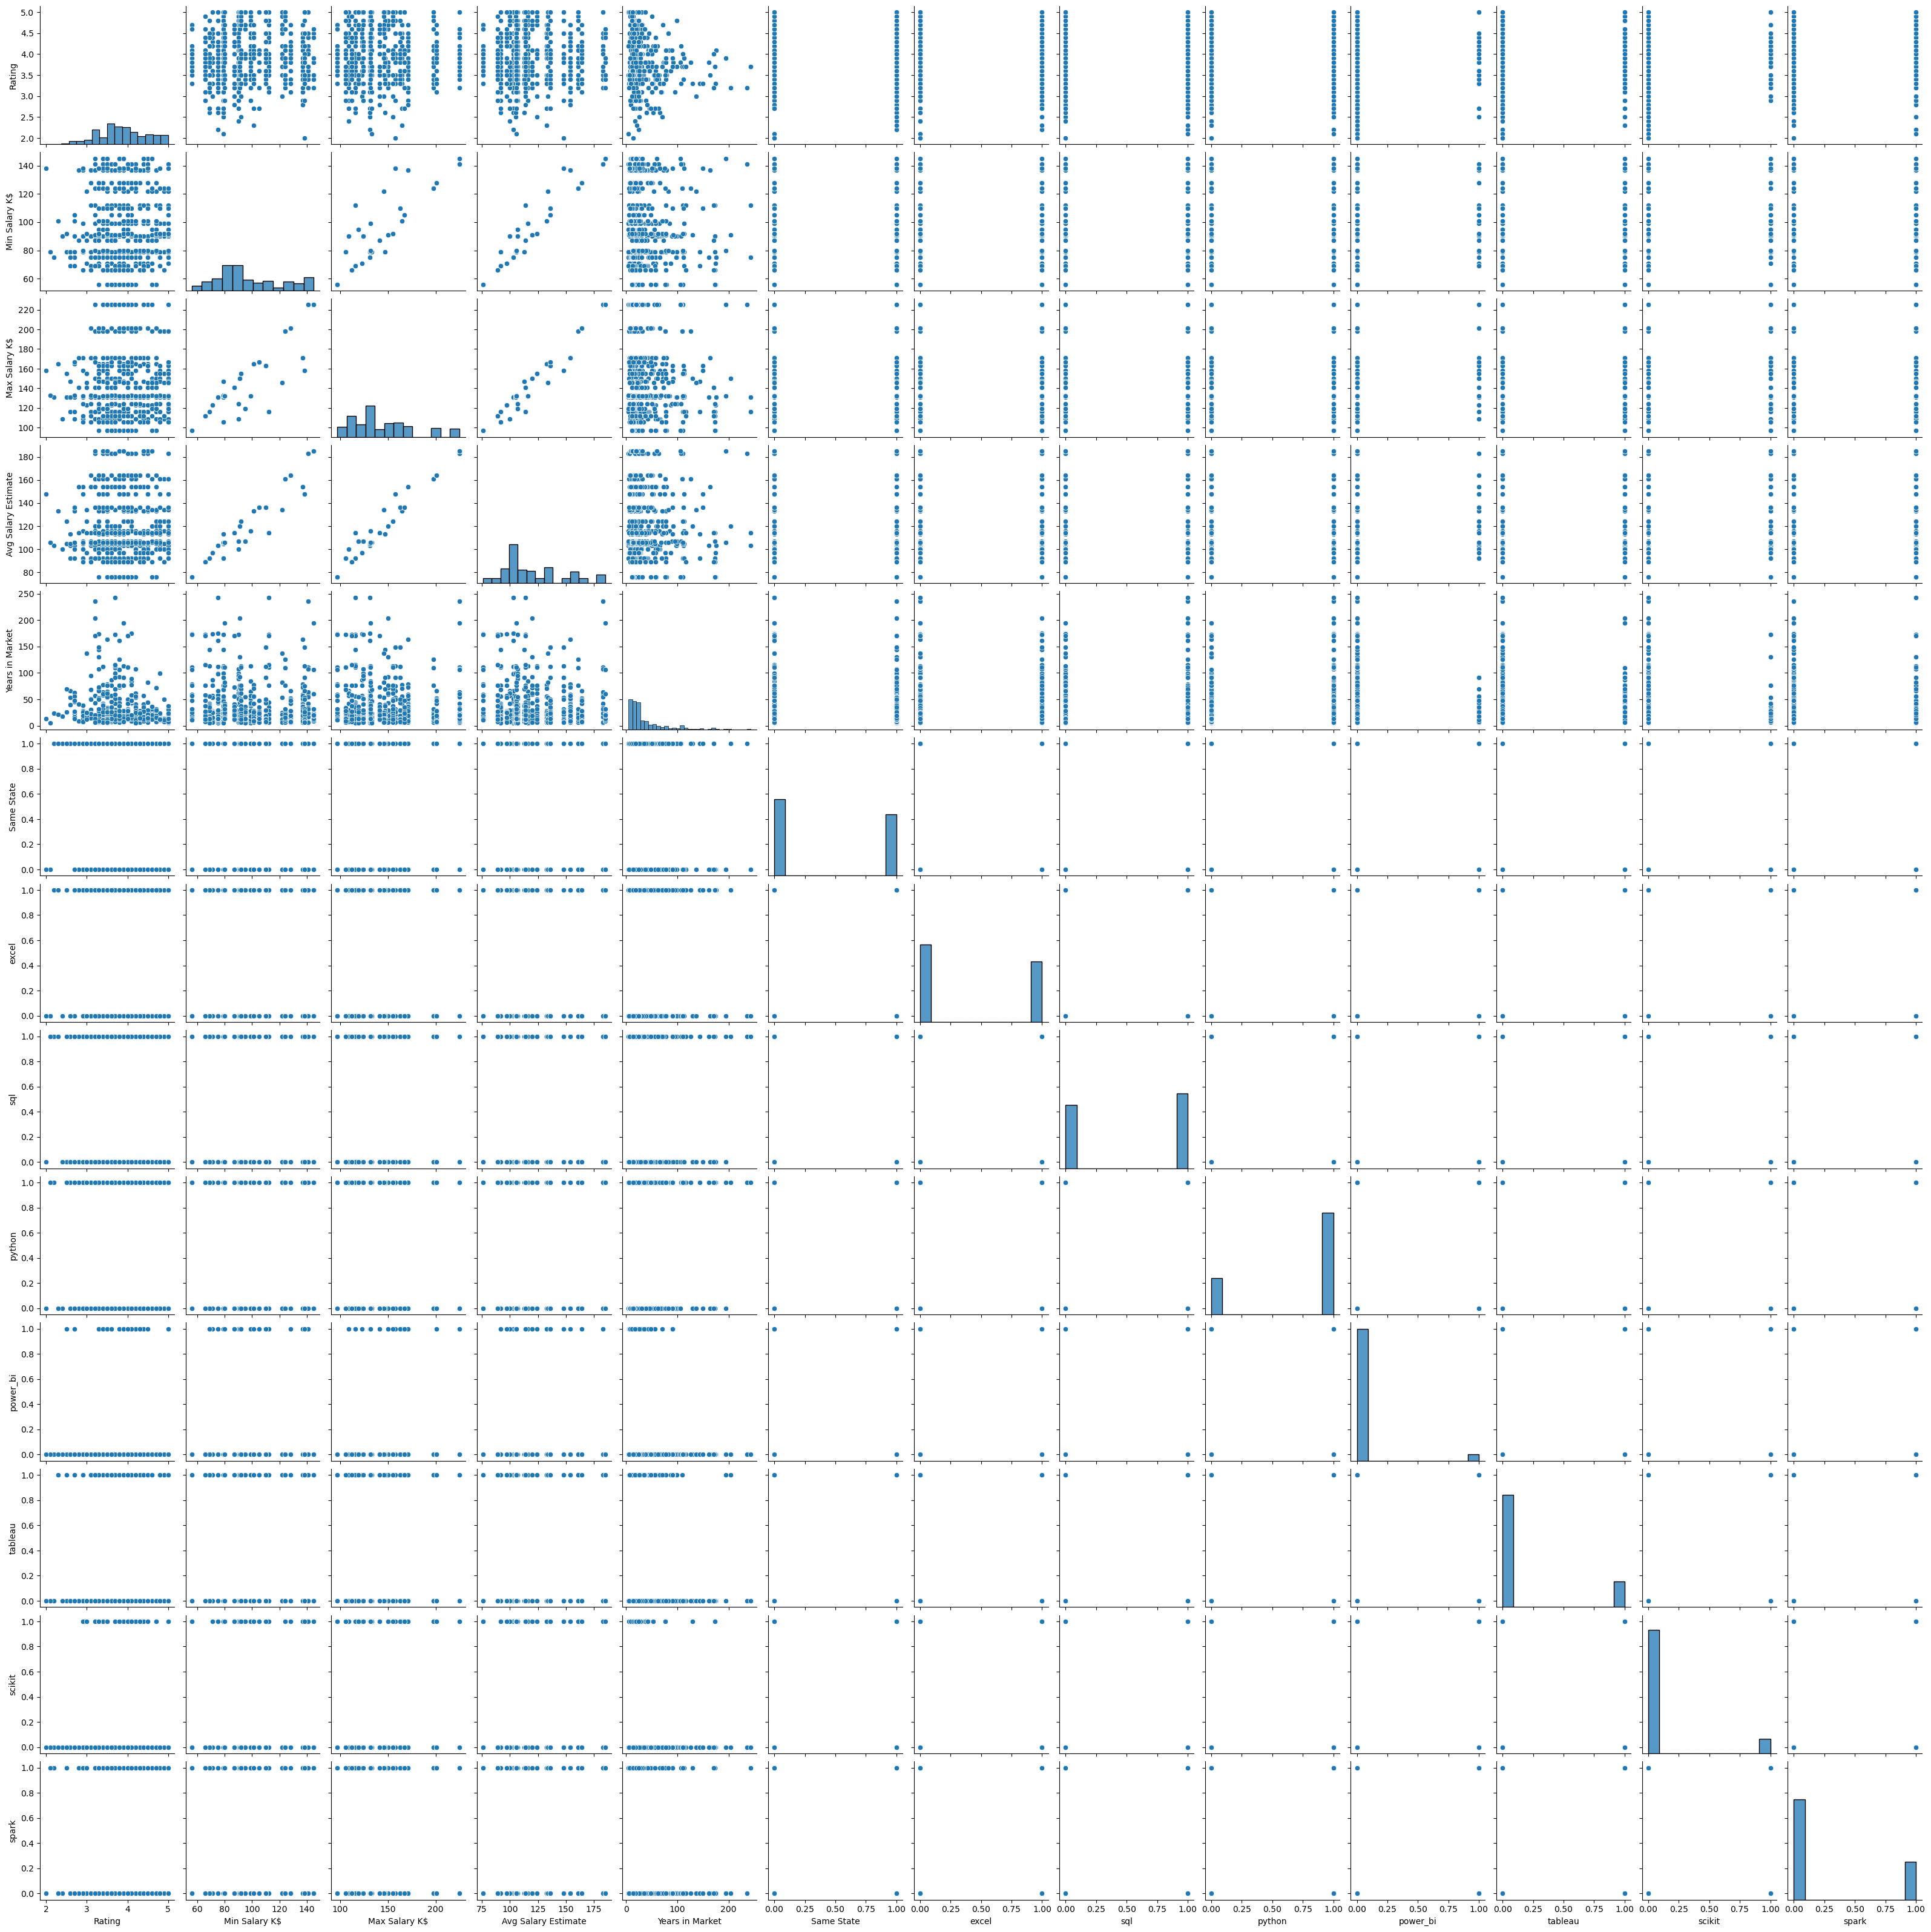

In [72]:
# Obtain the relationship between the columns
sns.pairplot(filtered_job_data)

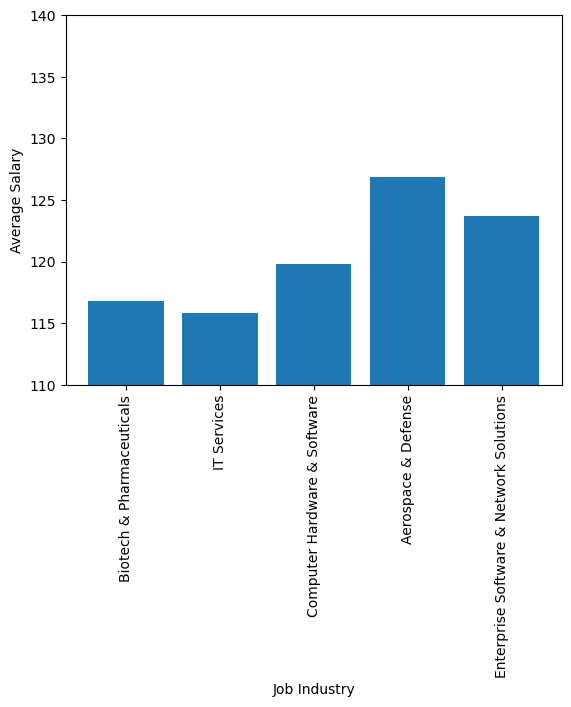

In [73]:
industry_salary = [
    round(filtered_job_data.loc[filtered_job_data["Industry"]=="Biotech & Pharmaceuticals","Avg Salary Estimate"].mean(), 2),
    round(filtered_job_data.loc[filtered_job_data["Industry"]=="IT Services","Avg Salary Estimate"].mean(), 2),
    round(filtered_job_data.loc[filtered_job_data["Industry"]=="Computer Hardware & Software","Avg Salary Estimate"].mean(), 2),
    round(filtered_job_data.loc[filtered_job_data["Industry"]=="Aerospace & Defense","Avg Salary Estimate"].mean(), 2),
    round(filtered_job_data.loc[filtered_job_data["Industry"]=="Enterprise Software & Network Solutions","Avg Salary Estimate"].mean(), 2)
]
top_paying_industries = [
    "Biotech & Pharmaceuticals",
    "IT Services",
    "Computer Hardware & Software",
    "Aerospace & Defense",
    "Enterprise Software & Network Solutions"
]

plt.bar(top_paying_industries, industry_salary)
plt.ylim(110, 140)
plt.xlabel("Job Industry")
plt.ylabel("Average Salary")

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

plt.show()


<AxesSubplot:xlabel='Avg Salary Estimate'>

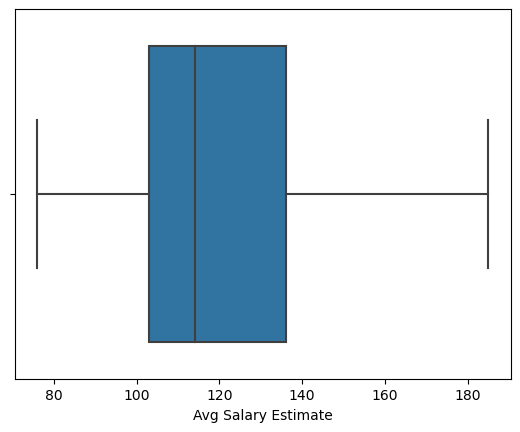

In [74]:
# Analysing the average salary estimation
sns.boxplot(x=filtered_job_data['Avg Salary Estimate'])

C:\Users\MyPc\AppData\Local\Temp\ipykernel_10896\4204729753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_job_data['Avg Salary Estimate'] = filtered_job_data['Avg Salary Estimate'].replace('[^0-9]', '', regex=True).astype(float)


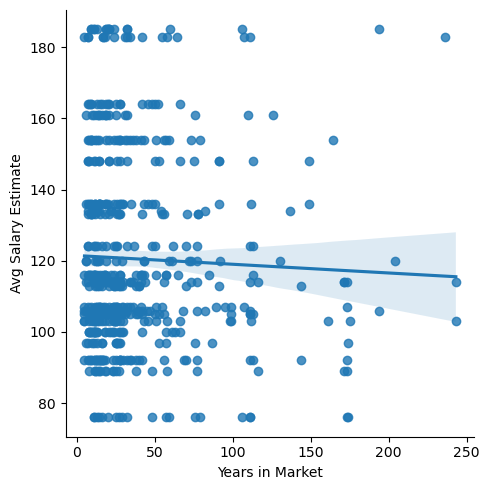

In [75]:
# Make a comparison between the years the company has been in the market and the avg. salary.
# Convert 'Avg Salary Estimate' column to numeric after removing non-numeric characters
filtered_job_data['Avg Salary Estimate'] = filtered_job_data['Avg Salary Estimate'].replace('[^0-9]', '', regex=True).astype(float)

# Plot the data using lmplot
sns.lmplot(x='Years in Market', y='Avg Salary Estimate', data=filtered_job_data)


<AxesSubplot:>

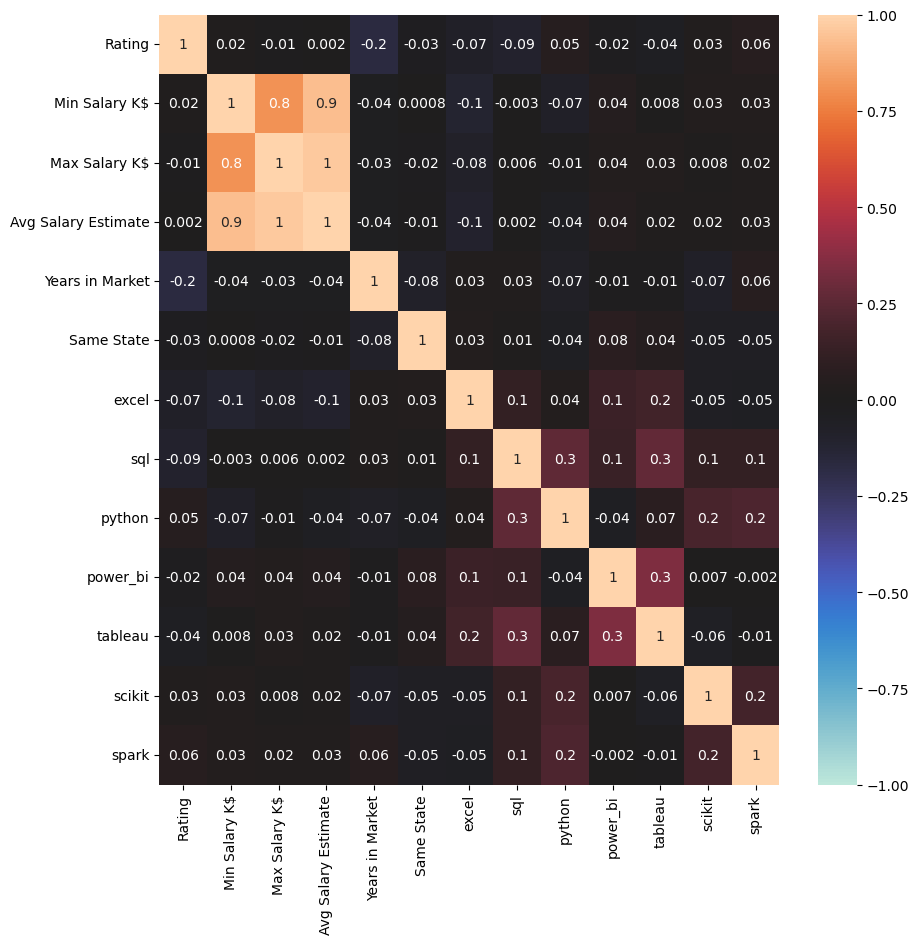

In [76]:
# Generate a heatmap based on the numerical columns of the dataframe
fig, ax = plt.subplots(figsize=(10,10)) 
matrix = np.triu(filtered_job_data.select_dtypes(include=[np.number]).corr())
sns.heatmap(filtered_job_data.select_dtypes(include=[np.number]).corr(),annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,  ax=ax)

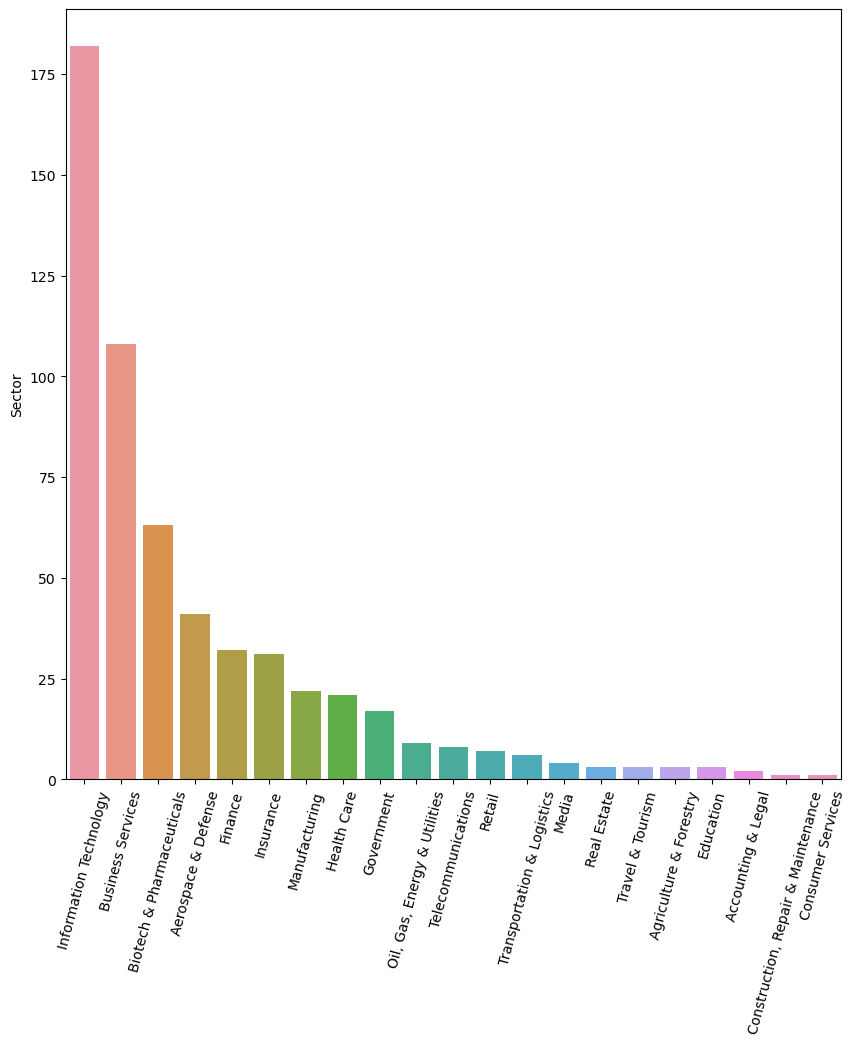

In [77]:
# Check the sector values
fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=filtered_job_data.Sector.value_counts().index, y=filtered_job_data.Sector.value_counts())
_= chart.set_xticklabels(chart.get_xticklabels(), rotation=75)

In [78]:
# Obtain the avg. salary for each type of role
pd.pivot_table(filtered_job_data,index='Job Role', values='Avg Salary Estimate')

,Avg Salary Estimate
Job Role,
Data Analyst,118.923077
Data Engineer,114.568182
Data Scientist,122.031496
Machine Learning Engineer,112.727273
Other,121.035088


In [79]:
# Obtain the avg. salary based on the seniority of the roles
pd.pivot_table(filtered_job_data, index=['Job Role','Job Seniority'], values='Avg Salary Estimate').sort_values('Avg Salary Estimate', ascending =False)

Avg Salary Estimate
Job Role                  Job Seniority                     
Other                     Mid-Level               126.916667
Data Analyst              Sr                      125.384615
Data Scientist            Mid-Level               123.549180
                          Sr                      121.136752
Machine Learning Engineer Sr                      120.285714
Data Engineer             Mid-Level               115.516129
Data Analyst              Mid-Level               114.833333
Other                     Sr                      114.076923
Data Engineer             Sr                      112.500000
                          Jr                      111.666667
Data Scientist            Jr                      108.750000
Machine Learning Engineer Mid-Level               107.157895
Other                     Jr                      105.875000
Data Analyst              Jr                       84.000000

In [80]:
# Define a custom aggregation function to get the percentage of descriptions that include certain skill.
def ones_percentage(x):
    return round((sum(1 for value in x if value == 1)/len(x))*100,2)

# Create the pivot table with the custom aggregation function
pivot_table = pd.pivot_table(filtered_job_data, index='Job Role', values=['excel', 'sql', 'python', 'power_bi', 'tableau', 'scikit', 'spark'], aggfunc=ones_percentage)

print(pivot_table)

                           excel  power_bi  python  scikit  spark    sql  \
Job Role                                                                   
Data Analyst               55.77      9.62   51.92    0.00   9.62  73.08   
Data Engineer              47.73     11.36   79.55    0.00  40.91  84.09   
Data Scientist             43.04      4.20   81.10   13.39  31.23  53.02   
Machine Learning Engineer  18.18      0.00   72.73   27.27  15.15  36.36   
Other                      49.12      0.00   38.60    0.00  14.04  31.58   

                           tableau  
Job Role                            
Data Analyst                 51.92  
Data Engineer                13.64  
Data Scientist               17.85  
Machine Learning Engineer     0.00  
Other                         8.77  


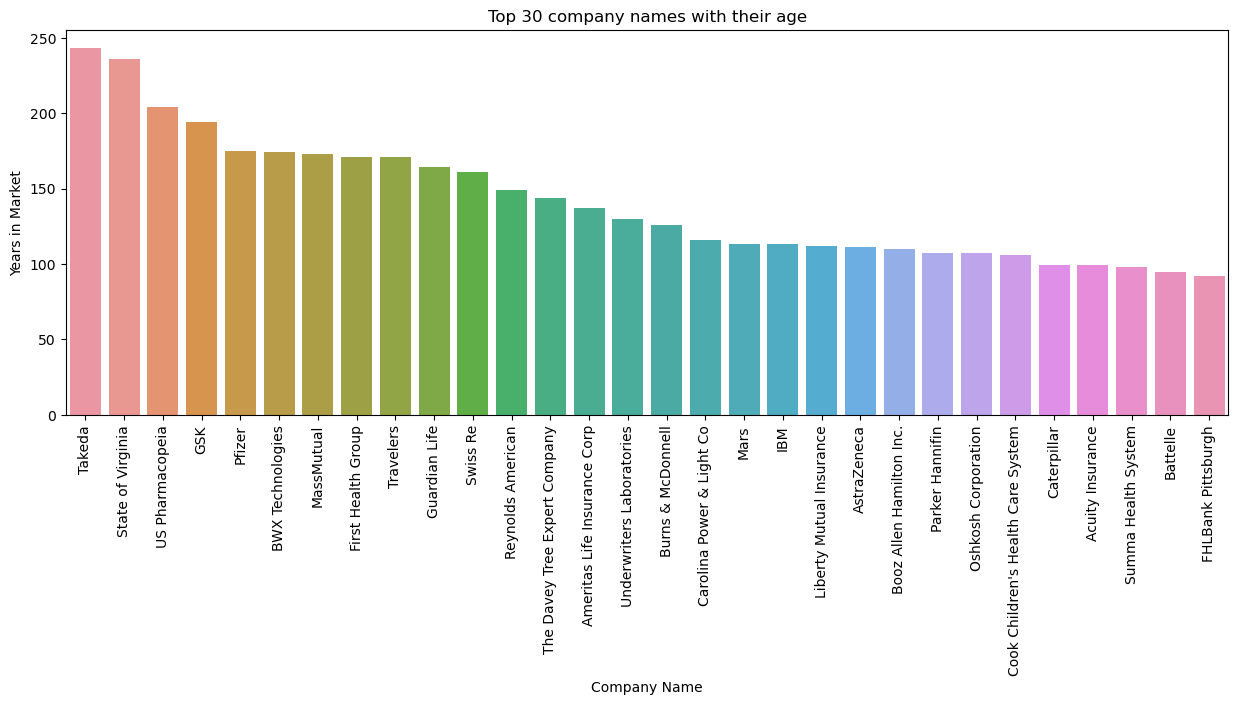

In [81]:
# Top 30 company names with their age
company=pd.pivot_table(filtered_job_data,index=['Company Name'],values='Years in Market').sort_values('Years in Market',ascending=False).head(30).reset_index()
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x='Company Name', y='Years in Market',data=company)
plt.title("Top 30 company names with their age")
plt.xticks(rotation=90)
plt.show()

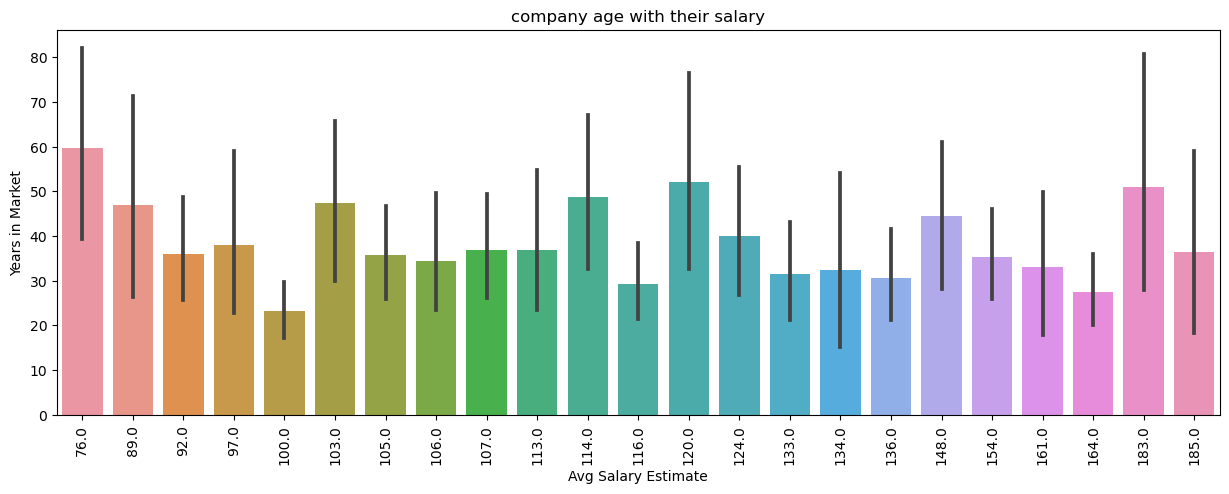

In [82]:
# RElationship between company age and salary
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x='Avg Salary Estimate', y='Years in Market',data=filtered_job_data)
plt.title("company age with their salary")
plt.xticks(rotation=90)
plt.show()

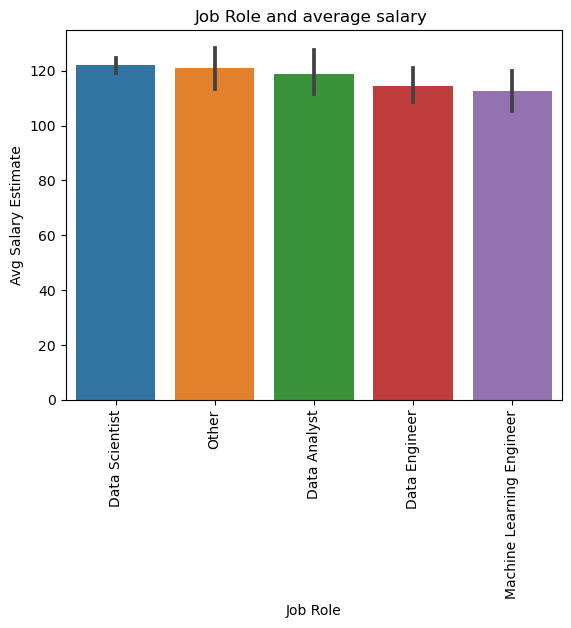

In [83]:
# Job Role and Avg Salart Estimate
sns.barplot(x='Job Role', y='Avg Salary Estimate',data=filtered_job_data)
plt.title("Job Role and average salary ")
plt.xticks(rotation=90)
plt.show()

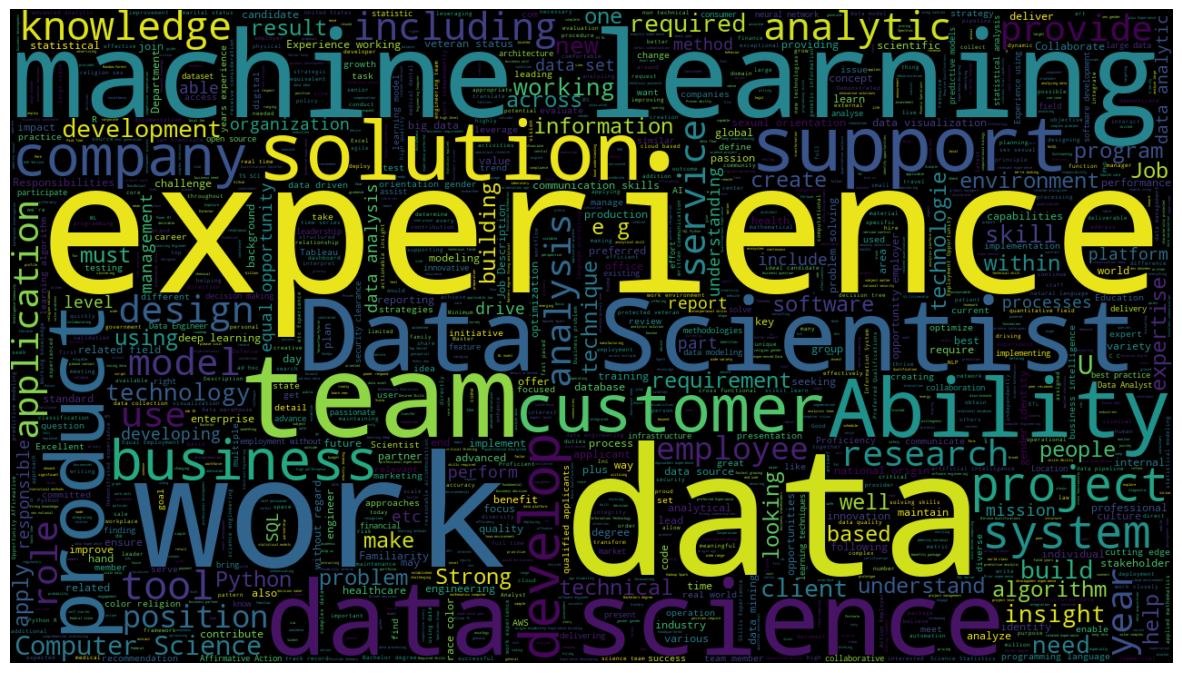

In [84]:
# Creating the word cloud for job data
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

words = " ".join(filtered_job_data['Job Description'])
wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      max_words=5000, width =1280, height = 720, 
                      background_color="black").generate(words)

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Linear Regression Analysis

Coefficient of Determination (R^2): -0.03779838098354915
Root Mean Squared Error (RMSE): 24.69829318931164


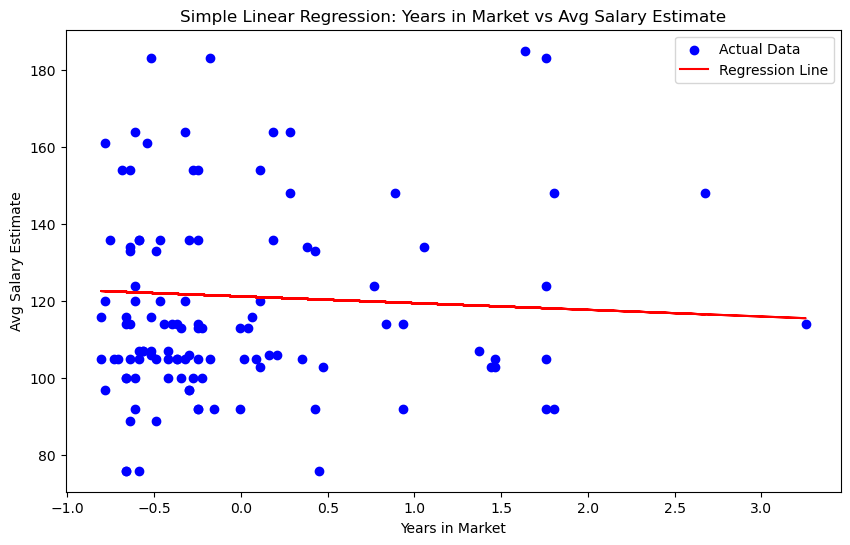

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming filtered_job_data is your DataFrame

# Selecting independent and dependent variables
X = filtered_job_data[['Years in Market']]  # Independent variable
y = filtered_job_data['Avg Salary Estimate']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization the data
scaler = StandardScaler()
# fit the value and transform the data
X_train = scaler.fit_transform(X_train)
# when we do it to the test we do not fit it.
X_test = scaler.transform(X_test)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Calculating the coefficient of determination (R^2)
r_squared = model.score(X_test, y_test)
print("Coefficient of Determination (R^2):", r_squared)

# Calculating the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Visualizing the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Years in Market')
plt.ylabel('Avg Salary Estimate')
plt.title('Simple Linear Regression: Years in Market vs Avg Salary Estimate')
plt.legend()
plt.show()
